In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from math import pi

plt.style.use('ggplot')
%matplotlib inline

# Preprocessing and EDA

In [2]:
full_library=pd.read_csv('library.csv')
full_library.head()

,Unnamed: 0,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,3zm4iHPL3kOKIOLvOYQrj9,Insurance from God,45 Grave,5,1989,0.203,0.697,9,-4.735,1,0.000027,0.219000,0.428,0.301,109.900,322653,4
1,1,2yM7Wq06WnoG30uUAQ3YLS,Take Five,45 Grave,4,1989,0.237,0.855,11,-6.390,0,0.001500,0.714000,0.106,0.189,114.700,519893,4
2,2,7BQxbEprN1OwOI5oIwocKw,Bad Love,45 Grave,5,1989,0.325,0.878,7,-3.747,1,0.000187,0.000000,0.838,0.635,111.568,171133,4
3,3,1AQ5nDzzeizcSPYBG00tI6,My Type,45 Grave,4,1989,0.395,0.963,7,-5.114,1,0.001100,0.000263,0.746,0.247,115.217,106640,4
4,4,5FHXazu6VKfPem9JpSfec0,Dream Hits,45 Grave,4,1989,0.213,0.905,2,-4.692,1,0.000059,0.000106,0.984,0.482,90.647,119160,4


Searching for zero values in order to clean up the final database.

In [3]:
print(f'Looking for NaN values in the dataframe: {full_library.isna().sum()}')
print()

Looking for NaN values in the dataframe: Unnamed: 0          0
id                  0
title               0
all_artists         0
popularity          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64



Dropping unwanted columns from the dataframe.

In [4]:
full_library = full_library.drop('Unnamed: 0', axis = 1)
full_library.head()

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3zm4iHPL3kOKIOLvOYQrj9,Insurance from God,45 Grave,5,1989,0.203,0.697,9,-4.735,1,0.000027,0.219000,0.428,0.301,109.900,322653,4
1,2yM7Wq06WnoG30uUAQ3YLS,Take Five,45 Grave,4,1989,0.237,0.855,11,-6.390,0,0.001500,0.714000,0.106,0.189,114.700,519893,4
2,7BQxbEprN1OwOI5oIwocKw,Bad Love,45 Grave,5,1989,0.325,0.878,7,-3.747,1,0.000187,0.000000,0.838,0.635,111.568,171133,4
3,1AQ5nDzzeizcSPYBG00tI6,My Type,45 Grave,4,1989,0.395,0.963,7,-5.114,1,0.001100,0.000263,0.746,0.247,115.217,106640,4
4,5FHXazu6VKfPem9JpSfec0,Dream Hits,45 Grave,4,1989,0.213,0.905,2,-4.692,1,0.000059,0.000106,0.984,0.482,90.647,119160,4


The final dataframe I will be using for my analysis. The library.csv file contains information on 2268 songs collected from my Spotify account. To collect data I put most of my library into a single playlist. Then I fetched the tracks and all of the associated info by accessing the Spotify Web API via Spotipy. 

Each track comes with an ID, title, artists, popularity score, release date and Spotify's music features. These encompass mood, technical aspects of the song, the way it was recorded/performed and more.

## Normalizing data

Since the values of loudness and tempo don't fall between 0 and 1 like other music features, I used sckit's MinMaxScaler() function to transform the values to the [0,1] range. Now that the features are on the same scale, the analysis should be more accurate overall. I created a new data frame with the normalized values.

In [5]:
songs = pd.read_csv('library.csv', index_col=[0])
features = songs[['id', 'title', 'all_artists', 'popularity', 'release_date',
                                       'danceability', 'energy', 'key', 'loudness',
                                       'mode', 'acousticness', 'instrumentalness',
                                       'liveness', 'valence', 'tempo',
                                       'duration_ms', 'time_signature']]

min_max_scaler = MinMaxScaler()
features.loc[:, 'loudness':'tempo'] = min_max_scaler.fit_transform(features.loc[:, 'loudness':'tempo'])
min_max_scaler.fit_transform(features.loc[:, 'loudness':'tempo'])

array([[8.03378619e-01, 1.00000000e+00, 2.58995373e-05, ...,
        4.32323232e-01, 3.08085977e-01, 4.49281109e-01],
       [7.49716287e-01, 0.00000000e+00, 1.50600232e-03, ...,
        1.07070707e-01, 1.93449335e-01, 4.68903942e-01],
       [8.35413897e-01, 1.00000000e+00, 1.86402297e-04, ...,
        8.46464646e-01, 6.49948823e-01, 4.56100044e-01],
       ...,
       [7.68165753e-01, 0.00000000e+00, 1.49733597e-02, ...,
        9.18181818e-02, 5.31218014e-01, 5.60150115e-01],
       [7.71051522e-01, 0.00000000e+00, 3.87924918e-02, ...,
        1.09090909e-01, 8.72057318e-01, 4.14912535e-01],
       [7.50526896e-01, 0.00000000e+00, 1.58778837e-02, ...,
        1.08080808e-01, 5.67041965e-01, 5.06853683e-01]])

In [6]:
features.head()

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3zm4iHPL3kOKIOLvOYQrj9,Insurance from God,45 Grave,5,1989,0.203,0.697,9,0.803379,1.0,0.000026,0.221436,0.432323,0.308086,0.449281,322653,4
1,2yM7Wq06WnoG30uUAQ3YLS,Take Five,45 Grave,4,1989,0.237,0.855,11,0.749716,0.0,0.001506,0.721941,0.107071,0.193449,0.468904,519893,4
2,7BQxbEprN1OwOI5oIwocKw,Bad Love,45 Grave,5,1989,0.325,0.878,7,0.835414,1.0,0.000186,0.000000,0.846465,0.649949,0.456100,171133,4
3,1AQ5nDzzeizcSPYBG00tI6,My Type,45 Grave,4,1989,0.395,0.963,7,0.791090,1.0,0.001104,0.000266,0.753535,0.252815,0.471017,106640,4
4,5FHXazu6VKfPem9JpSfec0,Dream Hits,45 Grave,4,1989,0.213,0.905,2,0.804773,1.0,0.000058,0.000107,0.993939,0.493347,0.370573,119160,4


In [7]:
print('Number of artists in library: ', len(list(features.all_artists.unique())))
print('Number of songs in library: ', len(list(features.id)))
print('Number of unique song titles in library: ', len(list(features.title.unique())))

Number of artists in library:  199
Number of songs in library:  2268
Number of unique song titles in library:  2143


In [8]:
print("Songs per artist:\n", features.all_artists.value_counts())

Songs per artist:
 The Cure               111
Lady Gaga              100
My Chemical Romance     99
The Used                69
Bauhaus                 66
                      ... 
Sebastian Rich           1
Steven Mackintosh        1
Megan Thee Stallion      1
Kit Connor               1
Azealia Banks            1
Name: all_artists, Length: 199, dtype: int64


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


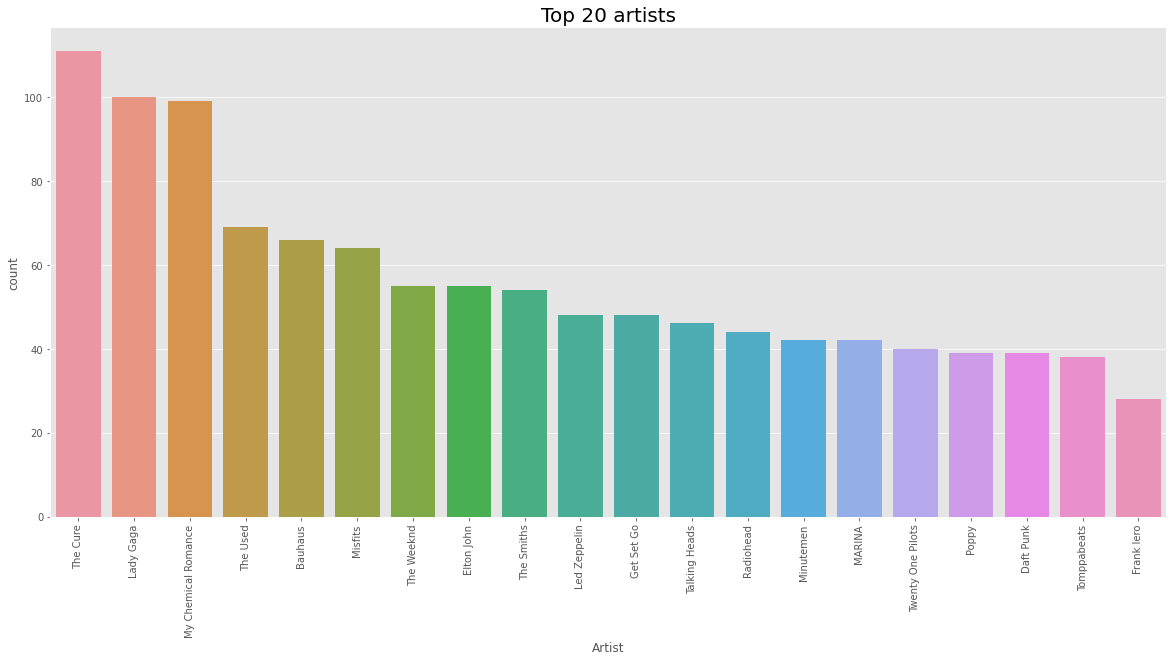

In [9]:
plt.figure(figsize=(20, 9))

plt.title("Top 20 artists", size=20)
sns.countplot(features.all_artists, order = full_library.all_artists.value_counts().iloc[:20].index)
plt.xlabel("Artist")
plt.xticks(rotation=90)

#plt.savefig("top20MINE.jpg")

plt.show()

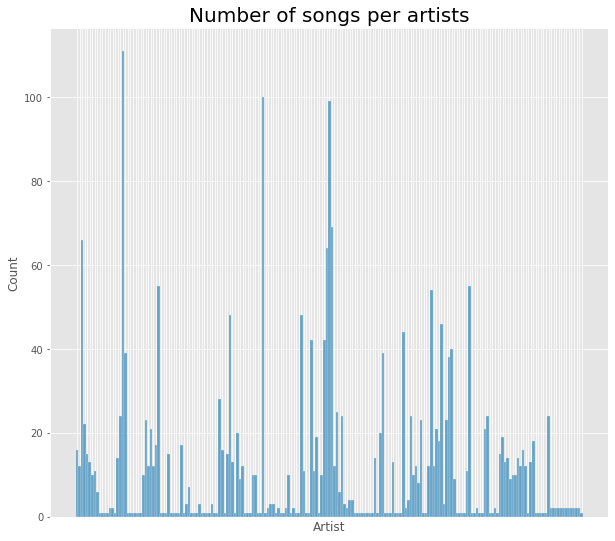

In [10]:
plt.figure(figsize=(10, 9))

plt.title("Number of songs per artists", size=20)
sns.histplot(features.all_artists, stat='count')
plt.xlabel("Artist")
plt.tick_params(
    axis='x',          
    which='both',     
    bottom=False,      
    top=False,       
    labelbottom=False)

#plt.savefig("songsperartistMINE.jpg")

plt.show()

Each bar here represents an artist. We can see that the tracks in my library are not equally divided between artists. 31% of songs come from just 10 artists. The rest of the artists contribute with  40 or less tracks. There are also many artists who are represented with just 1 or 2 songs. I clearly have some favorites I gravitate towards.

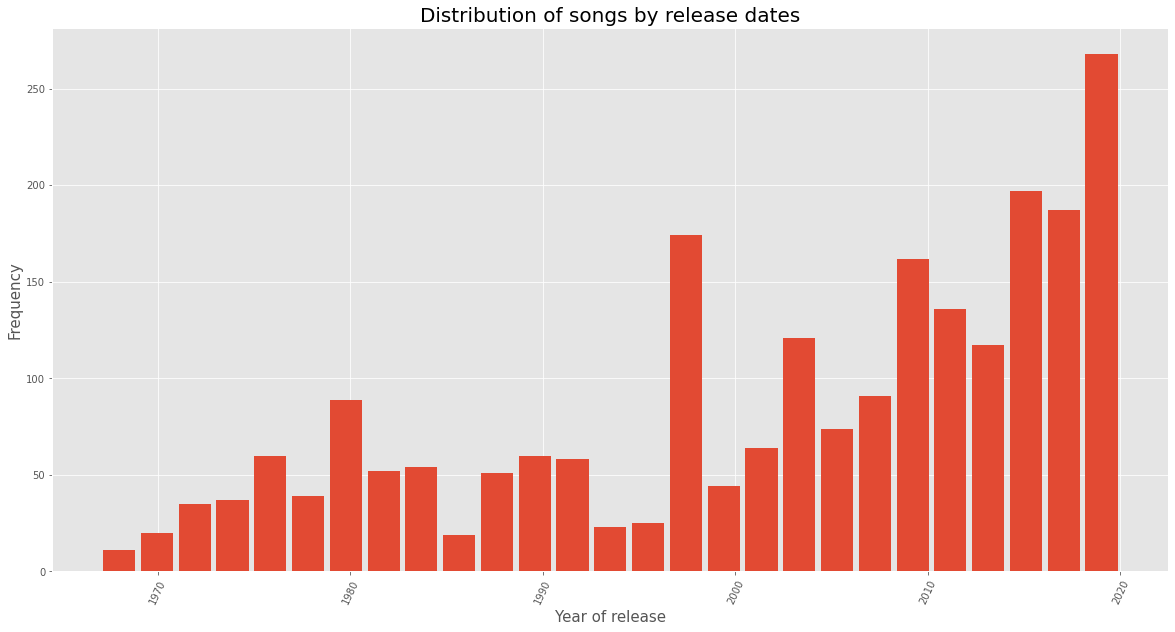

In [11]:
features['year'] = pd.DatetimeIndex(features['release_date']).year

plt.figure(figsize=(20,10))

plt.title("Distribution of songs by release dates", size=20)
plt.hist(features['year'], bins = 27, rwidth = 0.85)
plt.xlabel("Year of release", size = 15)
plt.ylabel("Frequency", size = 15)
plt.xticks(rotation=65)

plt.show()

Most tracks in the dataset that represents my music library were released the last two decades. The year 1998 stands out as an outlier in this trend. There is also a minor spike in early 80s. The data is left-skewed. Overall, we can see I prefer modern artists and gravitate towards recently recorded music. 

### Preprocessing the other data set

The other dataset that I am using in this analysis belongs to a random Spotify user. I thought that comparing my music data with someonebody elses could provide me with further insight into my music taste. I selected this playlist because it contains another user's full library and has a similar number of tracks. I performed all of the same steps on this dataset as I did for the previosu one.

In [12]:
random_library=pd.read_csv('randomuser.csv')
random_library.head()

,Unnamed: 0,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,5ueyLj6e6oVaTY0KQ6yLaA,All Shook Up,Elvis Presley,61,1958-03-21,0.624,0.468,10,-12.162,1,0.881,0.000006,0.1440,0.952,74.139,117080,4
1,1,5Vrczz39CvlD3OGCa6utoA,Grease - 2007 Remaster,Frankie Valli,64,1978,0.820,0.464,11,-8.450,1,0.156,0.000000,0.1010,0.872,109.374,207307,4
2,2,64Ny7djQ6rNJspquof2KoX,Hound Dog,Elvis Presley,66,1958-03-21,0.494,0.756,0,-8.492,1,0.733,0.005050,0.7600,0.949,86.895,136027,4
3,3,0bfvHnWWOeU1U5XeKyVLbW,Can't Take My Eyes off You,Frankie Valli,68,1967,0.581,0.780,4,-7.053,1,0.508,0.000011,0.0799,0.561,123.711,203680,4
4,4,0cOohRgFL2Q3sfAwsy2TIB,Overture,Bill Conti,41,1979-01-01,0.352,0.491,0,-14.843,1,0.248,0.770000,0.0946,0.428,154.281,518227,4


In [13]:
random_library = random_library.drop('Unnamed: 0', axis = 1)
random_library.head()

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,5ueyLj6e6oVaTY0KQ6yLaA,All Shook Up,Elvis Presley,61,1958-03-21,0.624,0.468,10,-12.162,1,0.881,0.000006,0.1440,0.952,74.139,117080,4
1,5Vrczz39CvlD3OGCa6utoA,Grease - 2007 Remaster,Frankie Valli,64,1978,0.820,0.464,11,-8.450,1,0.156,0.000000,0.1010,0.872,109.374,207307,4
2,64Ny7djQ6rNJspquof2KoX,Hound Dog,Elvis Presley,66,1958-03-21,0.494,0.756,0,-8.492,1,0.733,0.005050,0.7600,0.949,86.895,136027,4
3,0bfvHnWWOeU1U5XeKyVLbW,Can't Take My Eyes off You,Frankie Valli,68,1967,0.581,0.780,4,-7.053,1,0.508,0.000011,0.0799,0.561,123.711,203680,4
4,0cOohRgFL2Q3sfAwsy2TIB,Overture,Bill Conti,41,1979-01-01,0.352,0.491,0,-14.843,1,0.248,0.770000,0.0946,0.428,154.281,518227,4


In [14]:
songsF = pd.read_csv('randomuser.csv', index_col=[0])
featuresF = songsF[['id', 'title', 'all_artists', 'popularity', 'release_date',
                                       'danceability', 'energy', 'key', 'loudness',
                                       'mode', 'acousticness', 'instrumentalness',
                                       'liveness', 'valence', 'tempo',
                                       'duration_ms', 'time_signature']]

min_max_scaler = MinMaxScaler()
featuresF.loc[:, 'loudness':'tempo'] = min_max_scaler.fit_transform(featuresF.loc[:, 'loudness':'tempo'])
min_max_scaler.fit_transform(featuresF.loc[:, 'loudness':'tempo'])

array([[0.60271178, 1.        , 0.89260356, ..., 0.12610392, 0.96649746,
        0.15253598],
       [0.71921785, 1.        , 0.15805244, ..., 0.08194701, 0.88527919,
        0.36340405],
       [0.71789963, 1.        , 0.74265382, ..., 0.75867735, 0.96345178,
        0.22887579],
       ...,
       [0.86519569, 1.        , 0.00974404, ..., 0.34791538, 0.6680203 ,
        0.54799964],
       [0.75418223, 0.        , 0.01326988, ..., 0.02865065, 0.4822335 ,
        0.53543792],
       [0.53965663, 1.        , 0.08925793, ..., 0.96303142, 0.70050761,
        0.61260959]])

In [15]:
print('Number of artists in library: ', len(list(featuresF.all_artists.unique())))
print('Number of songs in library: ', len(list(featuresF.id)))
print('Number of unique song titles in library: ', len(list(featuresF.title.unique())))
print('\nSongs per artist:\n', featuresF.all_artists.value_counts())

Number of artists in library:  703
Number of songs in library:  2189
Number of unique song titles in library:  2042

Songs per artist:
 Bruce Springsteen     149
Queen                 119
Elvis Presley          99
Michael Jackson        47
Billy Squier           31
                     ... 
Sum 41                  1
Felix Jaehn             1
Tony Bennett            1
Corinne Bailey Rae      1
Steve Forbert           1
Name: all_artists, Length: 703, dtype: int64


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


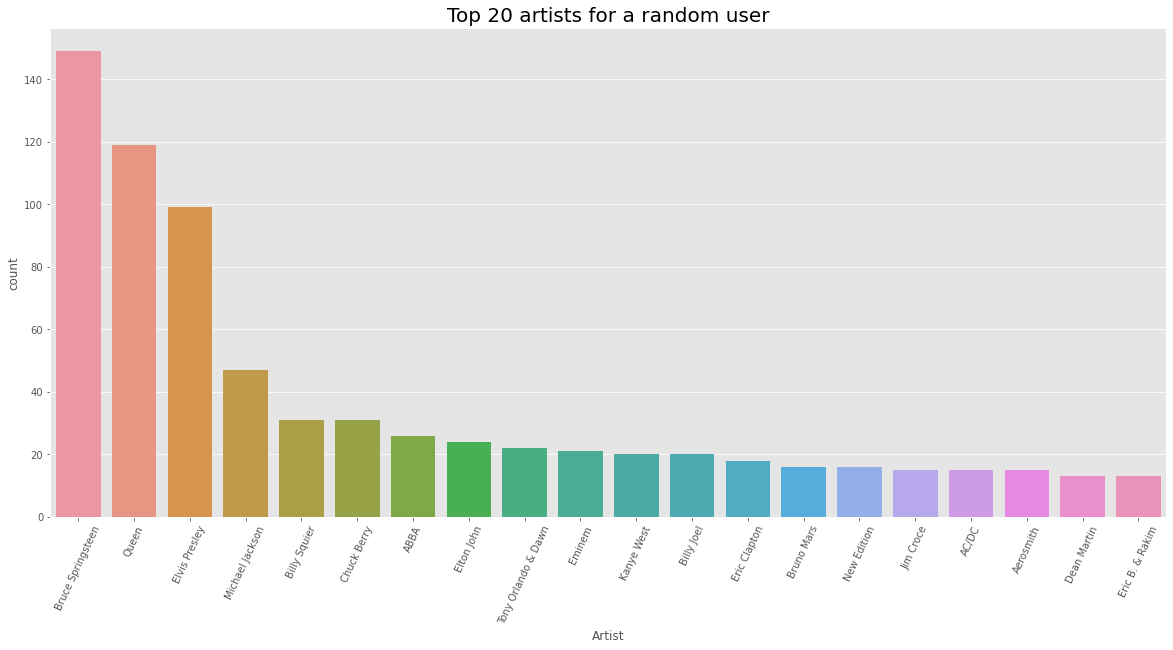

In [16]:
plt.figure(figsize=(20, 9))

plt.title("Top 20 artists for a random user", size=20)
sns.countplot(featuresF.all_artists, order = featuresF.all_artists.value_counts().iloc[:20].index)
plt.xticks(rotation=65)
plt.xlabel("Artist")

#plt.savefig("top20RAND")

plt.show()

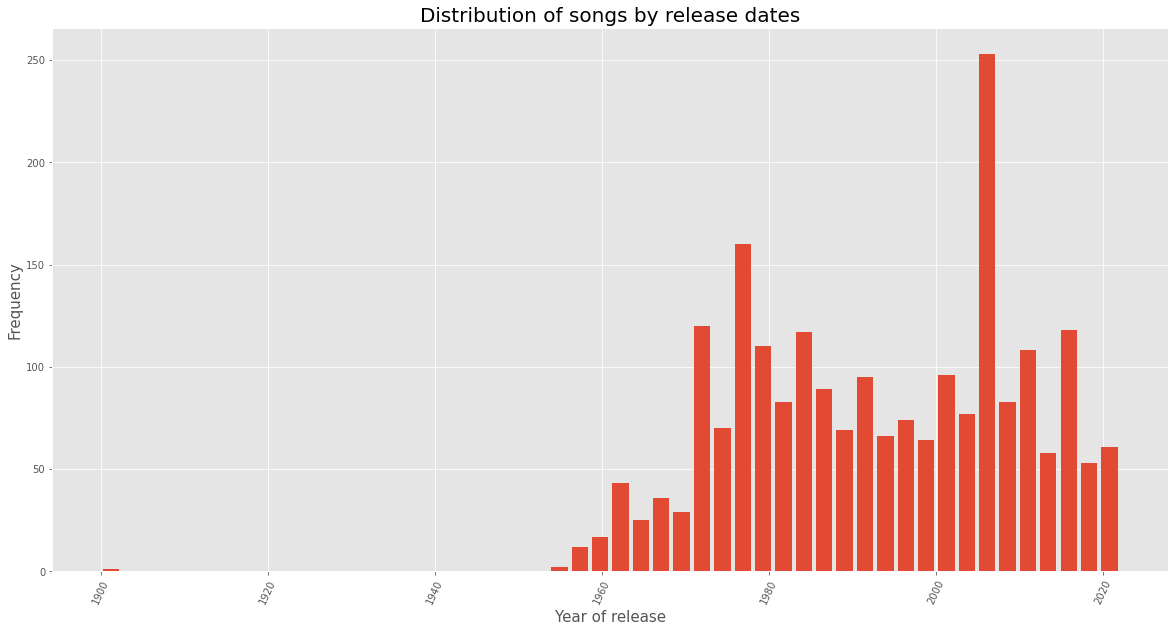

In [17]:
featuresF['year'] = pd.DatetimeIndex(featuresF['release_date']).year

plt.figure(figsize=(20,10))

plt.title("Distribution of songs by release dates", size=20)
plt.hist(featuresF['year'], bins = 50, rwidth=0.8)
plt.xlabel("Year of release", size = 15)
plt.ylabel("Frequency", size = 15)
plt.xticks(rotation=65)

#plt.savefig("releasedatedistribRAND.jpg")

plt.show()

The songs are more evenly distributed over time in the other dataset. This user seems to prefer older acts slightly more over newer ones. We could hypothesize about the reasons for this kind of distibution. The user might be older or simply prefer older musical acts. An outlier is the spike around the year 2010 - if we look at the top 20 artists it's possible that is due to the presence of Kanye West or Eminem tracks in the data set.

## Spotify audio features

- Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
    

- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    

- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    

- Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
     
     
- Key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    
    
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    
    
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.


- Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
    
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration


- Time signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
    

- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [18]:
features.head()

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,3zm4iHPL3kOKIOLvOYQrj9,Insurance from God,45 Grave,5,1989,0.203,0.697,9,0.803379,1.0,0.000026,0.221436,0.432323,0.308086,0.449281,322653,4,1989
1,2yM7Wq06WnoG30uUAQ3YLS,Take Five,45 Grave,4,1989,0.237,0.855,11,0.749716,0.0,0.001506,0.721941,0.107071,0.193449,0.468904,519893,4,1989
2,7BQxbEprN1OwOI5oIwocKw,Bad Love,45 Grave,5,1989,0.325,0.878,7,0.835414,1.0,0.000186,0.000000,0.846465,0.649949,0.456100,171133,4,1989
3,1AQ5nDzzeizcSPYBG00tI6,My Type,45 Grave,4,1989,0.395,0.963,7,0.791090,1.0,0.001104,0.000266,0.753535,0.252815,0.471017,106640,4,1989
4,5FHXazu6VKfPem9JpSfec0,Dream Hits,45 Grave,4,1989,0.213,0.905,2,0.804773,1.0,0.000058,0.000107,0.993939,0.493347,0.370573,119160,4,1989


Audio feature dataframe with normalized values for tempo and loudness.

# Analysis

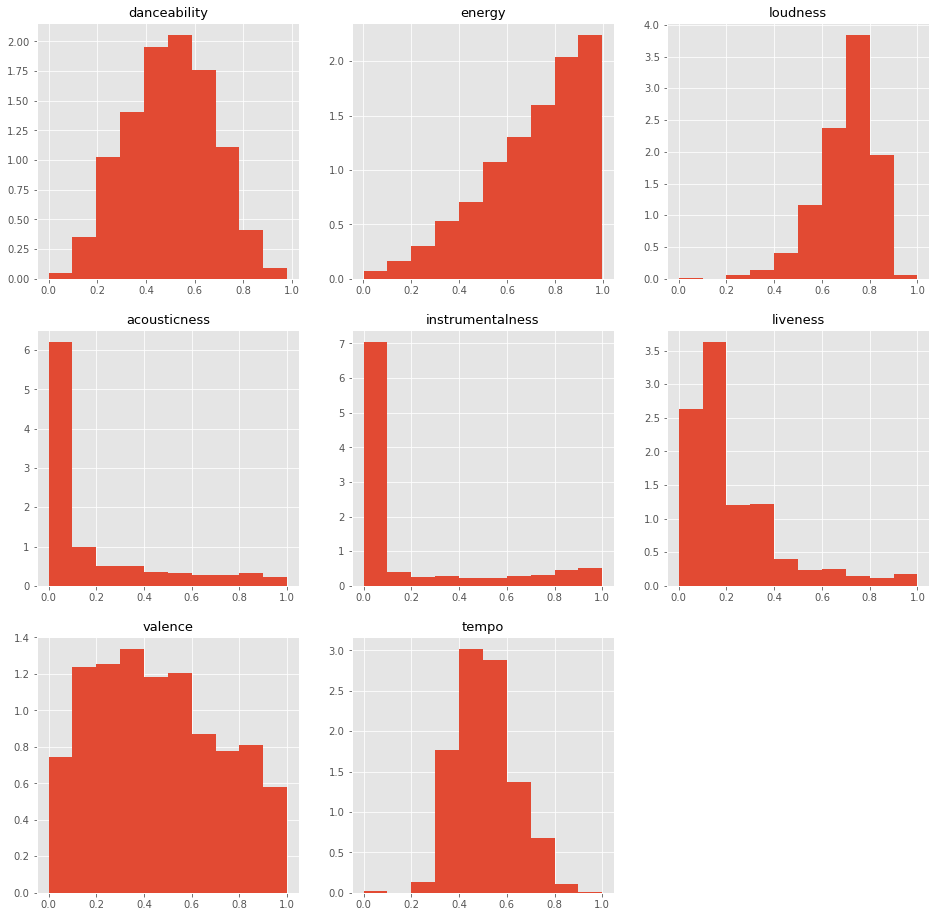

In [19]:
music_features = features.loc[:,['title','danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness',  'valence', 'tempo']]

fig, ax = plt.subplots(3, 2, figsize=(16,16))
for i in range(1, 9):
    plt.subplot(3, 3, i)
    plt.title(music_features.columns[i], fontsize=13)
    plt.hist(list(music_features.iloc[:,i]), density=True)

plt.show()

Here we can see the distribution audio features across the data. Danceability most closely resembles normal distribution out of them all. Most songs are moderately danceable, while very slow and very fast songs are rarer. The histogram for energy is negatively skewed and shows there are more songs with moderate to high energy. Fairly loud songs are more represented in my library than quiet ones, which correlates positively with energy. 

Measures for acousticness and instrumentalness are low, meaning that there aren't many purely acoustic or instrumental tracks in my library, and Spotify's algorithms are fairly confident in that assesment. Next feature shows there are some possible instances of live recordings. Valence is a feature the mood of a track, how 'happy' a song sounds. Overall, it looks like the data skews slightly towards sadder, low mood songs. Tempo is moderate, and most songs lie between the values of 0.4 and 0.6.

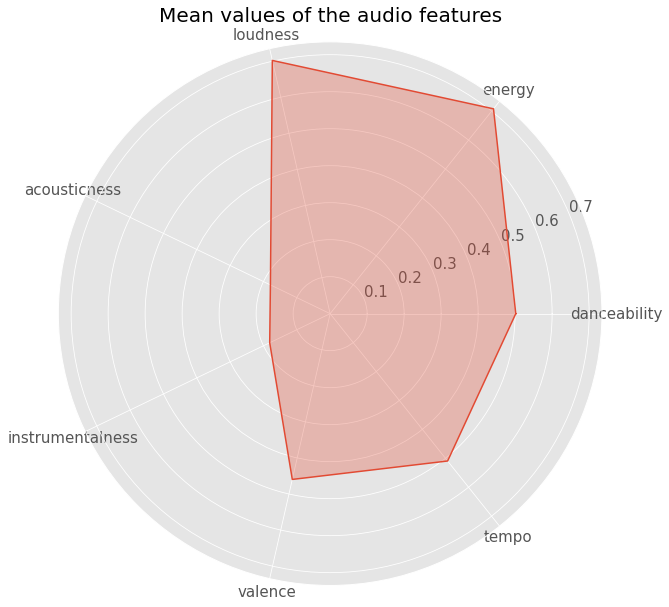

In [20]:
features_df = features.loc[: ,['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']]

fig=plt.figure(figsize=(20,10))
categories = list(features_df.columns)
N = len(categories)

value = list(features_df.mean())
value += value[:1]
angles = [n/float(N)*2*pi for n in range(N)]
angles += angles[:1]

plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

plt.xticks(angles[:-1], categories, size=15)
plt.yticks(size=15)
plt.title('Mean values of the audio features', size = 20)

plt.show()

This radar chart represents the mean values of audio features. The prevalent attributes amongst artists in my library are loudness and energy. The frequency of both features could be explained by my liking of rock and pop music. Despite high loudness and energy, valence isn't that common of an attribute. Most songs have low to moderate score. A possible explanation is the prevalence of alternative bands like My Chemical Romance in the data set - high energy songs with negative, sad or angry moods. 

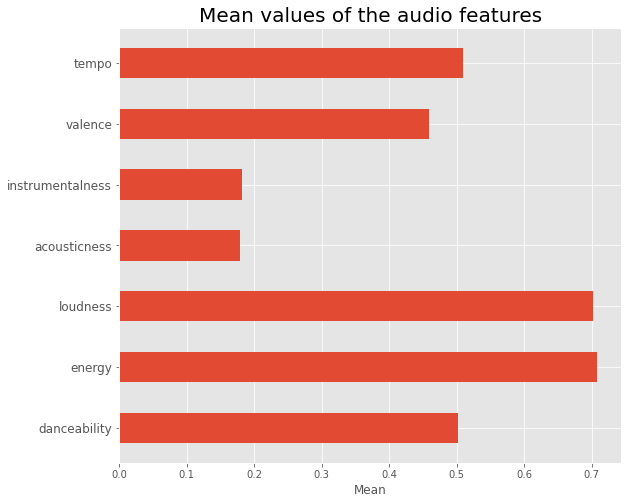

In [21]:
fig=plt.figure(figsize=(9,8))

width=0.5

plt.barh(categories, features_df.mean(), width)
plt.xlabel('Mean', size = 12)
plt.yticks(fontsize = 12)
plt.title('Mean values of the audio features', size = 20)

plt.show()

Mean values of audio features represented in a standard bar plot. It seems that loudness, energy and tempo are the three main audio features that influence whether I will like or dislike a track. Meanwhile acoustic and instrumental elements are something I avoid.

## Correlation between audio features

Here I wanted to more closely examine how different audio features correlate to one another. Below we can see a pair plot showing the relationship between pairs of audio features found in my data set. 

<Figure size 1440x1440 with 0 Axes>

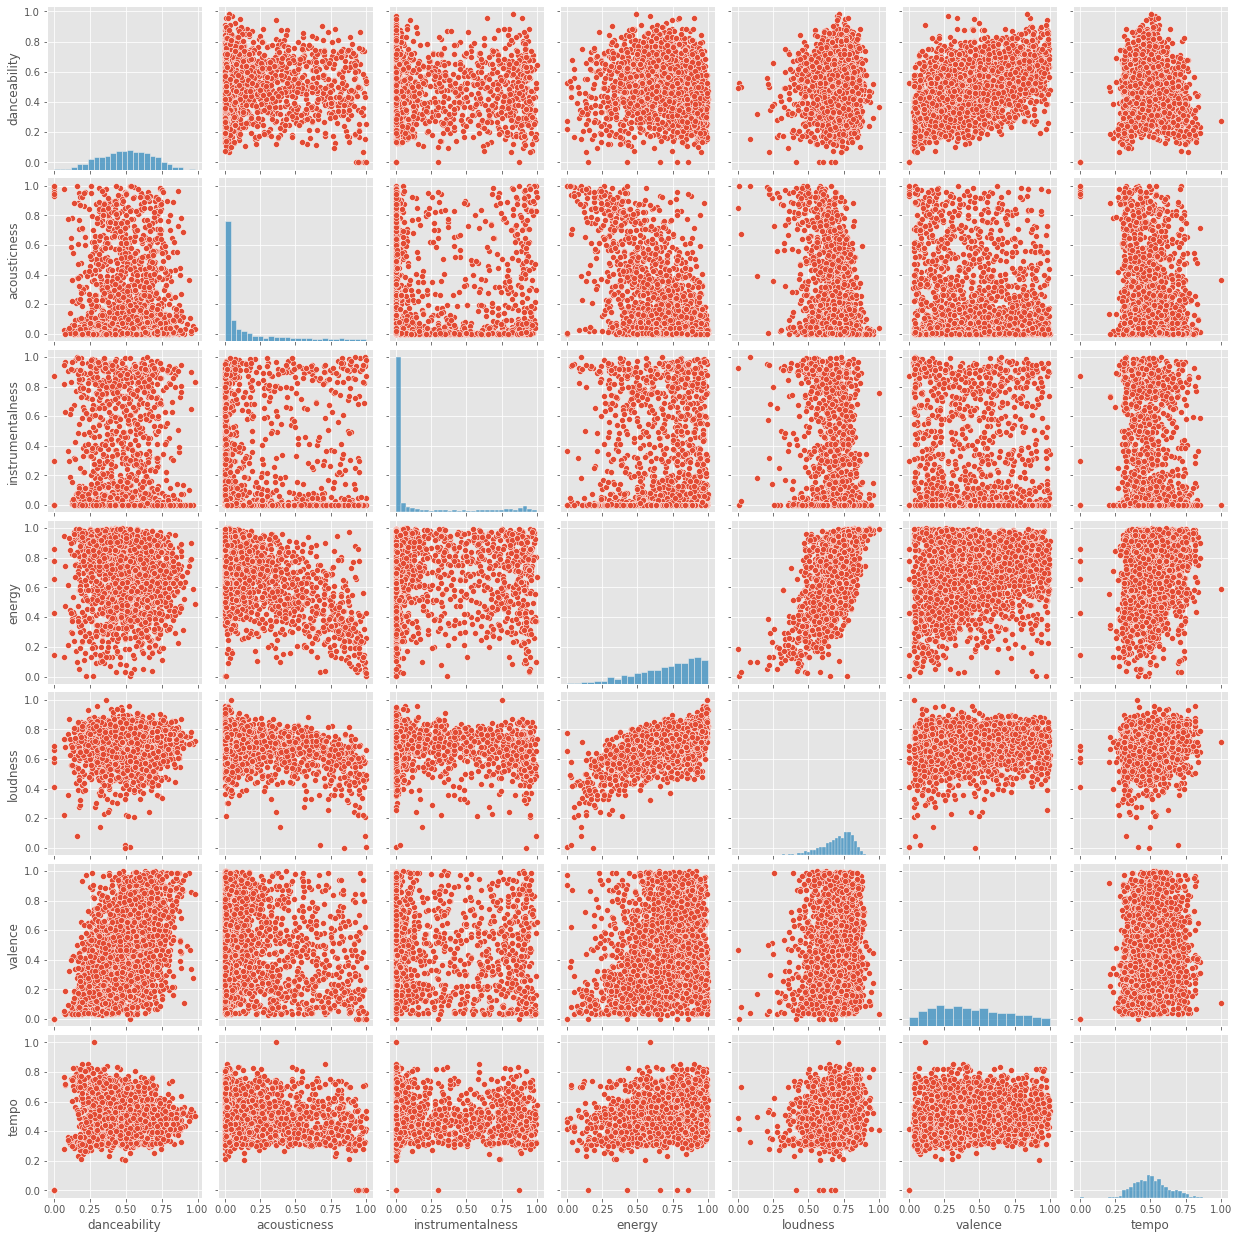

In [22]:
plt.figure(figsize=(20,20))

sns.pairplot(features, vars=['danceability', 'acousticness','instrumentalness','energy', 'loudness', 'valence', 'tempo'])

#plt.savefig('pairplot.jpg')

plt.show()

We can see that most of the features actually don't have a very strong relationship between them. There also seem to be plenty of outliers in a few of the plots. Due to the number of features and tracks the data is a bit hard to read. A heatmap gives us clearer insight.

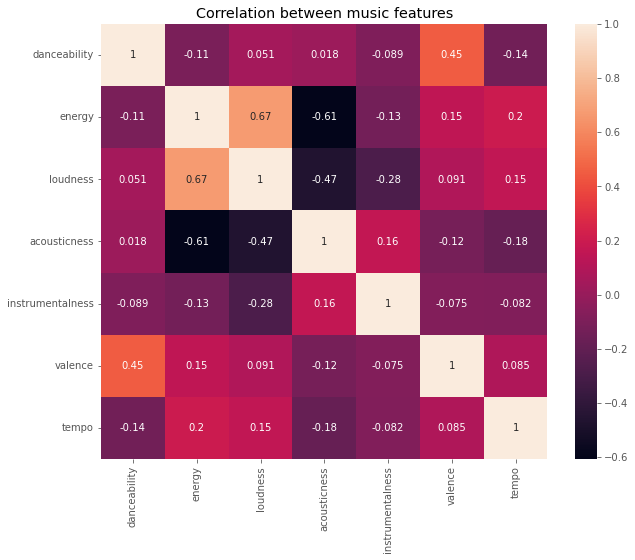

In [23]:
corr = features_df.corr()

plt.figure(figsize = (10,8)) 

sns.heatmap(corr, annot=True)
plt.title('Correlation between music features')

#plt.savefig('heatmap.jpg')

plt.show()

Now it's a lot easier to see how pairs of features correlate to eachother. There are clear relationships between loudness and energy, valence and danceability and acousticness and energy. 

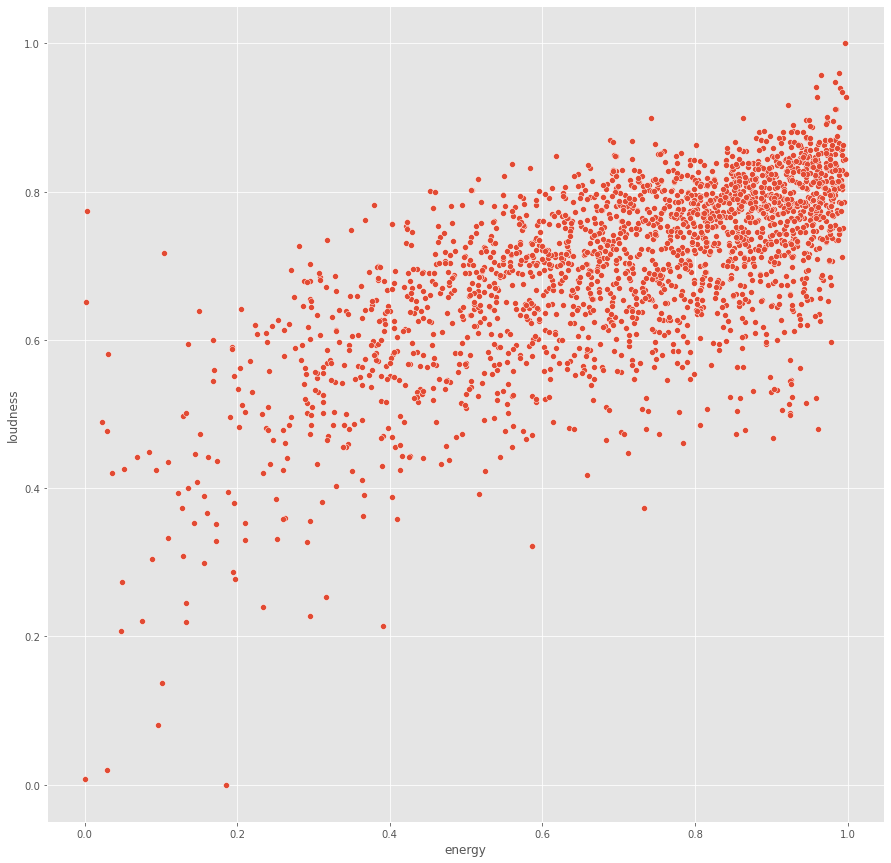

In [24]:
plt.figure(figsize=(15,15))

sns.scatterplot(x='energy',y='loudness',data=features_df)

plt.show()

Loudness and energy are the only two features in the data set that have a strong positive correlation. It seems that tracks with high values for loudness also have high energy. From this, one could conclude my data set contains mostly loud, energetic songs which is true as mentioned before. It would be easy to extrapolate the artists in my library are more likely to produce songs in genres like rock, punk and pop as opposed to blues, jazz or reggae for example.

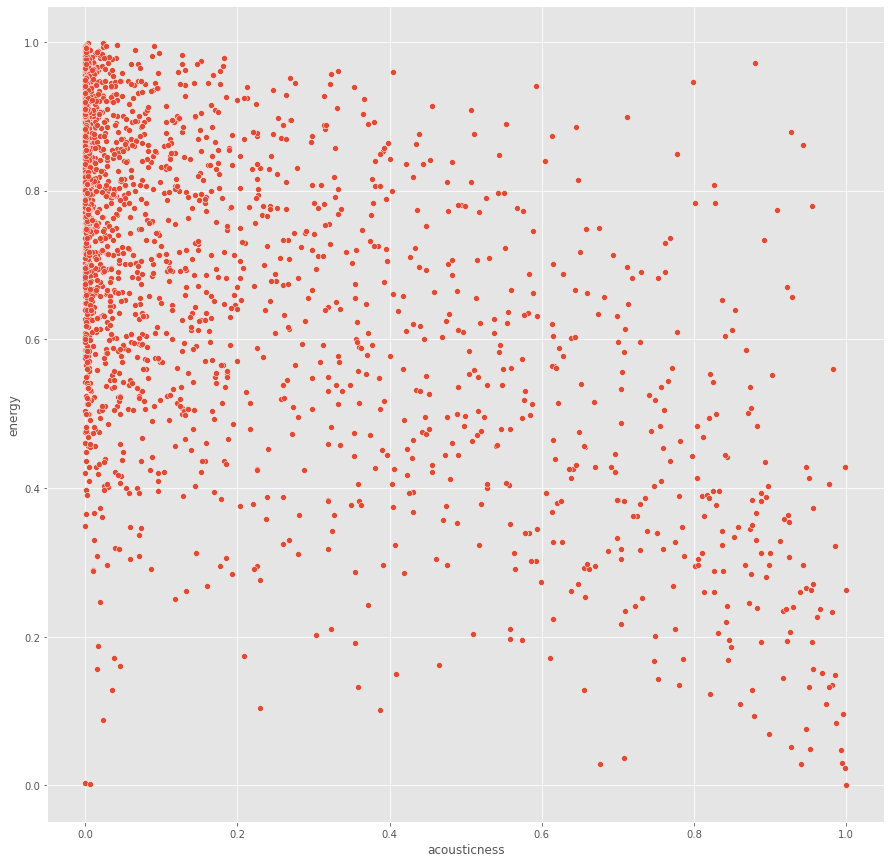

In [25]:
plt.figure(figsize=(15,15))

sns.scatterplot(x='acousticness',y='energy',data=features_df)

plt.show()

Energy and acousticness have a strong negative correlation. In my data set, there isn't a large amount of purely acoustic tracks and we can see that I prefer songs with high energy which are not likely to be acoustic.

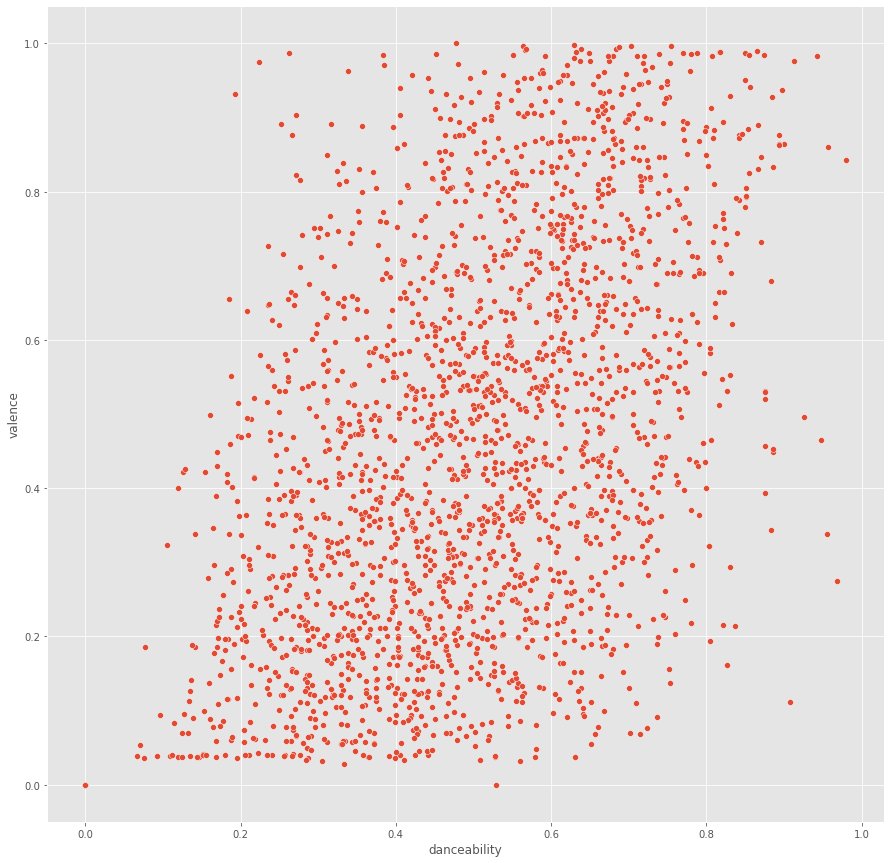

In [26]:
plt.figure(figsize=(15,15))

sns.scatterplot(x='danceability', y='valence',data=features_df)

plt.show()

Valence and danceability have a slightly positive relationship, however there also seem to be some outliers. This means that the data includes some tracks which have a negative mood but are highly danceable and vice versa. Sad but danceable songs can be found in some subgenres of goth, emo and rock which I do listen to frequently. This is consistent with my previous observations and with the most frequent artists featured in the dataset. 

## Comparison

First, I wanted to take a look at popularity scores and how they compare. 

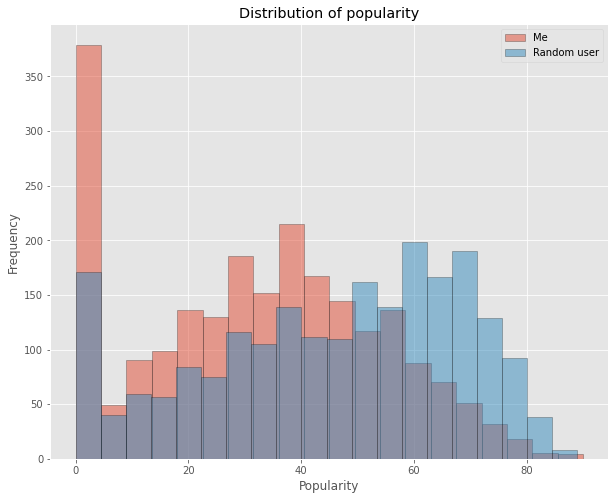

In [27]:
plt.figure(figsize=(10,8))

plt.hist(features['popularity'], bins=20, edgecolor = 'black', alpha=0.5, label = 'Me')
plt.hist(featuresF['popularity'], bins=20, edgecolor = 'black', alpha=0.5, label = 'Random user')

plt.xlabel('Popularity')
plt.ylabel('Frequency')

plt.title("Distribution of popularity")
plt.legend()

#plt.savefig('popularity.jpg')

plt.show()

The distribution of popularity is more irregular in the data set representing my music library, with most of the tracks having a very low popularity score. The number of tracks drops of the higher the score is. The other set includes music that is moderately to highly popular although the frequency of songs also decreases with popularity. Neither of us seem to listen to many very popular songs, but comparatively my taste seems to be a bit more niche.

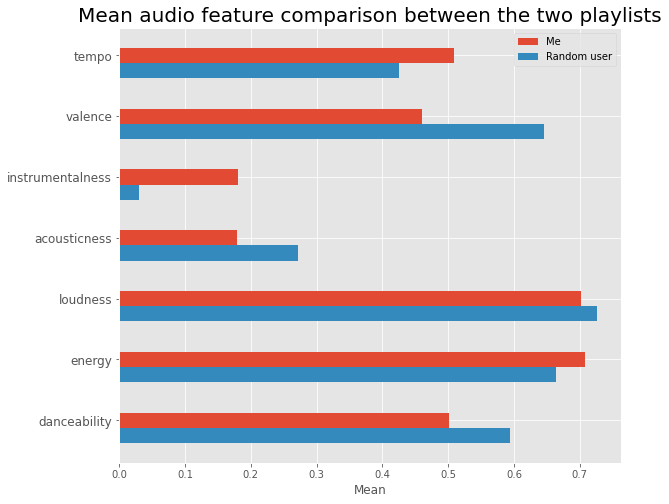

In [28]:
featuresF_df = featuresF.loc[: ,['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']]
fig = plt.figure(figsize=(9,8))

width = 0.25

br2 = np.arange(len(featuresF_df.mean()))
br1 = [x + width for x in br2]

plt.barh(br1, features_df.mean(), width,  label='Me')
plt.barh(br2, featuresF_df.mean(), width, label='Random user')

plt.xlabel('Mean', size = 12)
plt.yticks([r + width for r in range(len(featuresF_df.mean()))],['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo' ], fontsize = 12)

plt.title('Mean audio feature comparison between the two playlists', size = 20)
plt.legend()

#plt.savefig("meancomp.jpg")

plt.show()

The plot shows how the mean values of audio features compare between the two data sets. This users top audio features are valence, loudness and energy. My library contains songs that are sadder, more instrumental and more energetic while the random user seems to enjoy happier, louder songs with a lower measure of BPM. 

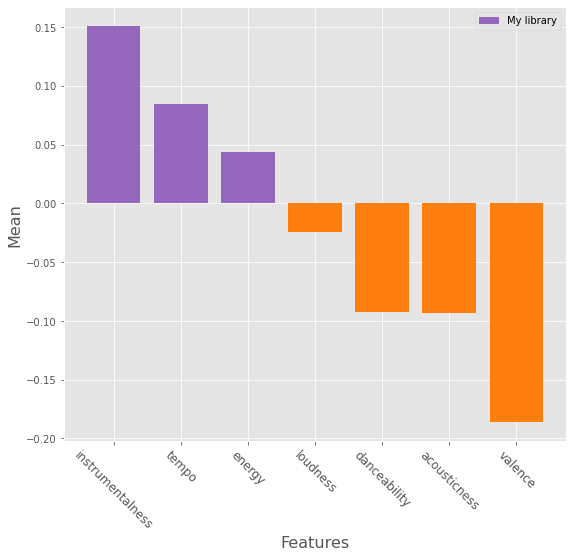

In [29]:
colors = ['tab:purple', 'tab:purple', 'tab:purple', 'tab:orange','tab:orange','tab:orange','tab:orange']

dif_features = features_df.mean() - featuresF_df.mean()
index = dif_features.sort_values(ascending = False).index

fig, ax = plt.subplots(figsize=(9,8))

x = np.arange(dif_features.count())
y = dif_features.sort_values(ascending = False)
plt.bar(x, y, color=colors, label='My library')
plt.xticks(x, (features_df.columns), size = 12)
ax.set_xticklabels(index, rotation=-45)

plt.legend(loc = 'upper right')
plt.ylabel('Mean', fontsize = 16)
plt.xlabel('Features', fontsize = 16)

#plt.savefig("meancomp2.jpg")

plt.show()

This next plot shows the difference between mean values for each audio feature. The biggest difference is found in instrumentalness and valence, while our loudness values are the most similar. 

In order to see how varied the two data sets are in terms of audio features, I decided to use standard deviation. I computed the mean of standard deviation values for each of the music attributes. 

In [30]:
print('STD mean of audio features from my library', round(features_df.std().mean(),2))
print('STD mean of audio features from a random library', round(featuresF_df.std().mean(),2))

STD mean of audio features from my library 0.21
STD mean of audio features from a random library 0.19


The results could indicate that the features found in my data set are more diverse than the audio attributes found in the data set for the random user, but only slightly. From this, we could conclude that my music taste is more diverse in comparison, however it could also just mean that some tracks simply have much higher values of specific features which skews the results.

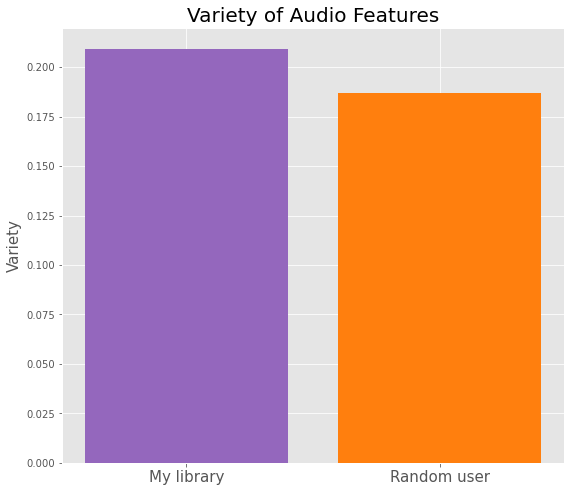

In [31]:
colors = ['tab:purple', 'tab:orange']
data = [features_df.std().mean(), featuresF_df.std().mean()]

labels = ('My library','Random user')
pos = np.arange(len(labels))

plt.figure(figsize=(9,8))

plt.bar(pos, data, align = 'center', color=colors)
plt.xticks(pos, labels, fontsize = 15)
plt.ylabel('Variety', size = 15)
plt.title('Variety of Audio Features', size = 20)

plt.show()

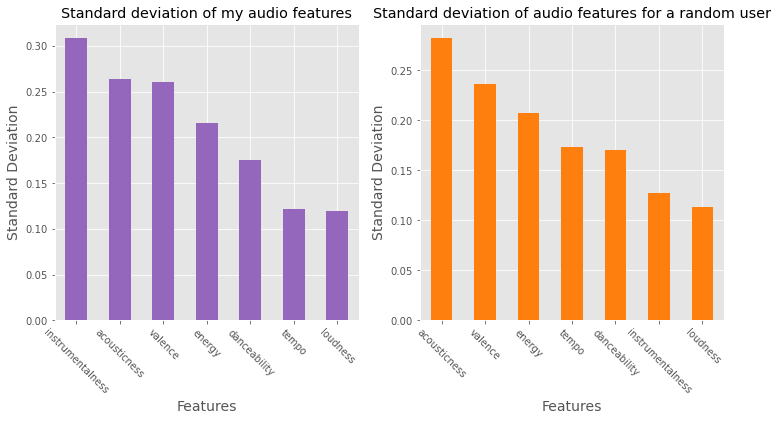

In [32]:
fig = plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)

features_df.std().sort_values(ascending= False).plot(kind = 'bar', color = 'tab:purple')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.xticks(rotation=-45)
plt.title("Standard deviation of my audio features")

plt.subplot(2,2,2)
featuresF_df.std().sort_values(ascending= False).plot(kind = 'bar', color = 'tab:orange')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.xticks(rotation = -45)
plt.title("Standard deviation of audio features for a random user")

plt.show()